In [1]:
# Importing libraries and loading dataset
import pandas as pd

# Load datasets
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# Display the first few rows of each dataframe to understand the structure
print("Movies dataframe:")
print(movies_df.head())

print("\nRatings dataframe:")
print(ratings_df.head())


Movies dataframe:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Ratings dataframe:
   userId  movieId  rating   timestamp
0       1       16     4.0  1217897793
1       1       24     1.5  1217895807
2       1       32     4.0  1217896246
3       1       47     4.0  1217896556
4       1       50     4.0  1217896523


In [2]:
# Check for null values in the movies dataframe
print("Null values in Movies dataframe:")
print(movies_df.isnull().sum())

# Check for null values in the ratings dataframe
print("\nNull values in Ratings dataframe:")
print(ratings_df.isnull().sum())


Null values in Movies dataframe:
movieId    0
title      0
genres     0
dtype: int64

Null values in Ratings dataframe:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


# Data visualizations

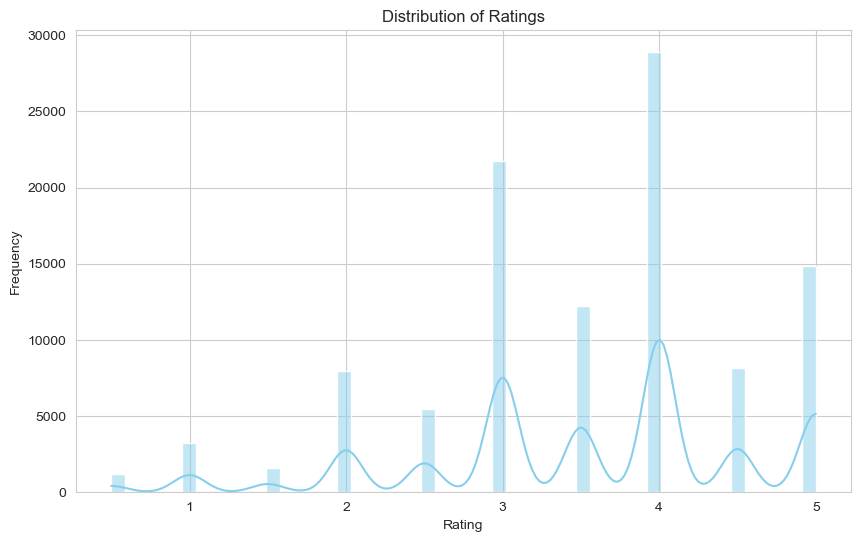

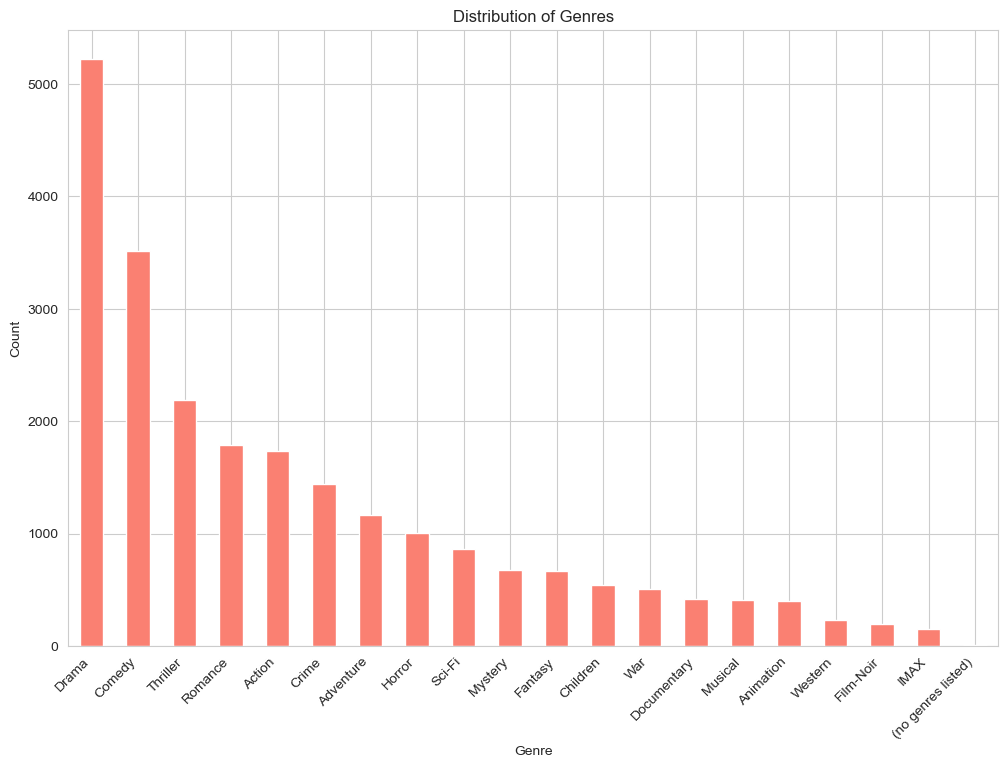

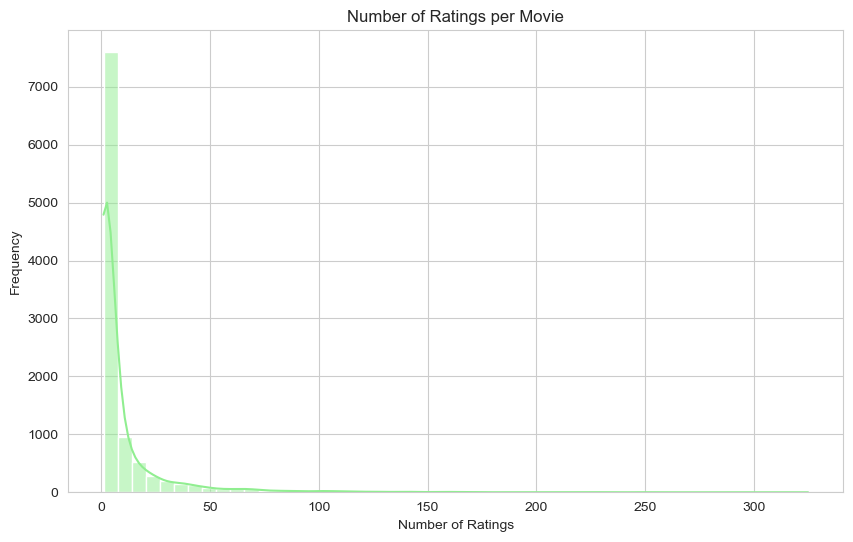

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set_style("whitegrid")

# 1. Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(ratings_df['rating'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Genres Distribution
plt.figure(figsize=(12, 8))
genres_count = movies_df['genres'].str.split('|', expand=True).stack().value_counts()
genres_count.plot(kind='bar', color='salmon')
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3. Number of Ratings per Movie
ratings_per_movie = ratings_df.groupby('movieId').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_movie, bins=50, kde=True, color='lightgreen')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


In [3]:
def popularity_recommender(genre, min_reviews_threshold, num_recommendations):
    # Filter movies by genre
    genre_movies = movies_df[movies_df['genres'].str.contains(genre)]

    # Merge with ratings to get the average rating and number of reviews for each movie
    genre_ratings = pd.merge(genre_movies, ratings_df, on='movieId', how='inner')
    genre_ratings_grouped = genre_ratings.groupby('title').agg({'rating': ['mean', 'count']})
    genre_ratings_grouped.columns = ['average_rating', 'num_reviews']

    # Apply minimum reviews threshold
    genre_ratings_filtered = genre_ratings_grouped[genre_ratings_grouped['num_reviews'] >= min_reviews_threshold]

    # Sort by average rating and number of reviews
    genre_ratings_sorted = genre_ratings_filtered.sort_values(by=['average_rating', 'num_reviews'], ascending=False)

    # Get top N recommendations
    top_recommendations = genre_ratings_sorted.head(num_recommendations)

    return top_recommendations

# Test the popularity-based recommender system
genre = 'Comedy'  # Example genre
min_reviews_threshold = 100  # Example minimum reviews threshold
num_recommendations = 5  # Example number of recommendations

popularity_recommendations = popularity_recommender(genre, min_reviews_threshold, num_recommendations)
print("Popularity-based Recommendations for Genre:", genre)
print(popularity_recommendations)


Popularity-based Recommendations for Genre: Comedy
                                        average_rating  num_reviews
title                                                              
Monty Python and the Holy Grail (1975)        4.301948          154
Fargo (1996)                                  4.271144          201
Princess Bride, The (1987)                    4.163743          171
Pulp Fiction (1994)                           4.160000          325
Forrest Gump (1994)                           4.138264          311


In [4]:
#EDA Exploratory data Analysis
def popularity_recommender_for_all_genres(min_reviews_threshold, num_recommendations):
    genre_recommendations = {}

    # Iterate through each unique genre
    unique_genres = movies_df['genres'].str.split('|', expand=True).stack().unique()
    for genre in unique_genres:
        genre_recommendations[genre] = popularity_recommender(genre, min_reviews_threshold, num_recommendations)

    return genre_recommendations

# Define parameters
min_reviews_threshold = 100  # Example minimum reviews threshold
num_recommendations = 5  # Example number of recommendations

# Generate popularity-based recommendations for all genres
all_genre_recommendations = popularity_recommender_for_all_genres(min_reviews_threshold, num_recommendations)

# Print recommendations for each genre
for genre, recommendations in all_genre_recommendations.items():
    print(f"Popularity-based Recommendations for Genre: {genre}")
    print(recommendations)
    print()


Popularity-based Recommendations for Genre: Adventure
                                                    average_rating  \
title                                                                
Monty Python and the Holy Grail (1975)                    4.301948   
Star Wars: Episode V - The Empire Strikes Back ...        4.228070   
Raiders of the Lost Ark (Indiana Jones and the ...        4.212054   
Star Wars: Episode IV - A New Hope (1977)                 4.188645   
Princess Bride, The (1987)                                4.163743   

                                                    num_reviews  
title                                                            
Monty Python and the Holy Grail (1975)                      154  
Star Wars: Episode V - The Empire Strikes Back ...          228  
Raiders of the Lost Ark (Indiana Jones and the ...          224  
Star Wars: Episode IV - A New Hope (1977)                   273  
Princess Bride, The (1987)                                 

C:\Users\Samudranil Dutta\AppData\Local\Temp\ipykernel_13052\4040600325.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_movies = movies_df[movies_df['genres'].str.contains(genre)]


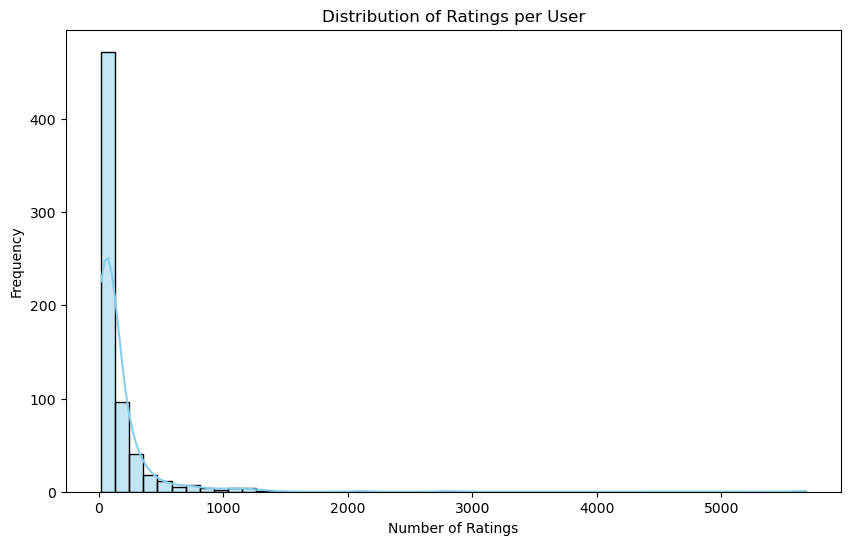

Top 10 Most Active Users:
userId
668    5678
575    2837
458    2086
232    1421
310    1287
475    1249
128    1231
224    1182
607    1176
63     1107
dtype: int64


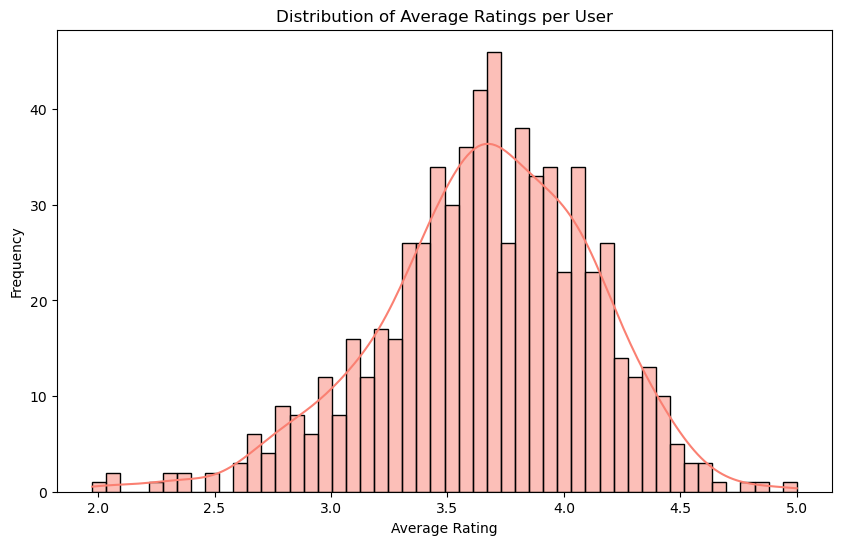

This code segment provides a thorough User Engagement Analysis.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load datasets
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')

# 1. User Engagement Analysis
# Distribution of the number of ratings given by each user
ratings_per_user = ratings_df.groupby('userId').size()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Identify the most active users
most_active_users = ratings_per_user.sort_values(ascending=False).head(10)
print("Top 10 Most Active Users:")
print(most_active_users)

# Distribution of ratings given by each user
ratings_per_user_mean = ratings_df.groupby('userId')['rating'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_user_mean, bins=50, kde=True, color='salmon')
plt.title('Distribution of Average Ratings per User')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()
print("This code segment provides a thorough User Engagement Analysis.")

Descriptive Statistics for Movie Ratings:
               mean        median          std         count
count  10325.000000  10325.000000  6687.000000  10325.000000
mean       3.177211      3.204843     0.866020     10.202324
std        0.817510      0.855405     0.398724     22.832341
min        0.500000      0.500000     0.000000      1.000000
25%        2.750000      2.750000     0.651920      1.000000
50%        3.272727      3.250000     0.856128      3.000000
75%        3.750000      4.000000     1.060660      8.000000
max        5.000000      5.000000     3.181981    325.000000


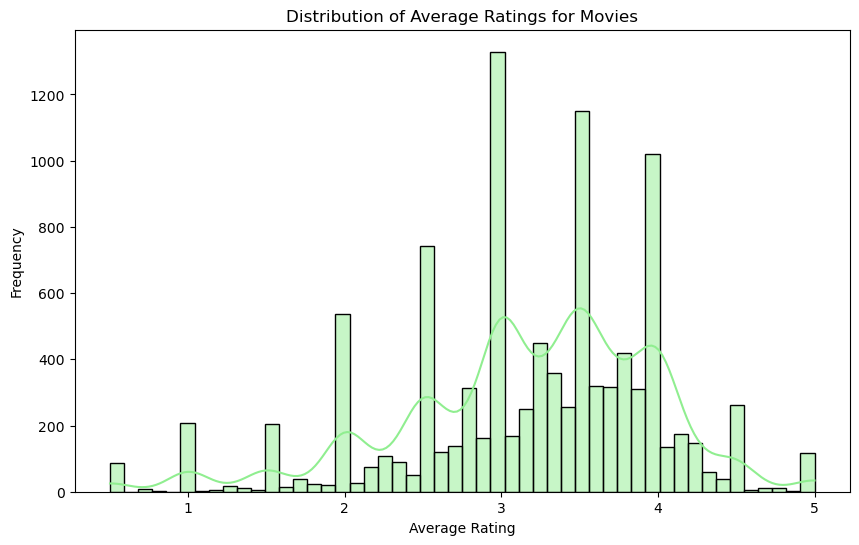

Top 10 Highest Rated Movies:
         mean  median  std  count
movieId                          
465       5.0     5.0  NaN      1
111387    5.0     5.0  NaN      1
1757      5.0     5.0  NaN      1
5003      5.0     5.0  NaN      1
5007      5.0     5.0  NaN      1
5037      5.0     5.0  NaN      1
5042      5.0     5.0  NaN      1
91007     5.0     5.0  NaN      1
5056      5.0     5.0  NaN      1
5090      5.0     5.0  NaN      1

Top 10 Lowest Rated Movies:
         mean  median  std  count
movieId                          
60382     0.5     0.5  NaN      1
77201     0.5     0.5  NaN      1
50445     0.5     0.5  NaN      1
2461      0.5     0.5  NaN      1
8119      0.5     0.5  NaN      1
50147     0.5     0.5  NaN      1
55156     0.5     0.5  NaN      1
26937     0.5     0.5  NaN      1
26755     0.5     0.5  NaN      1
50619     0.5     0.5  NaN      1


In [6]:
# 2. Movie Statistics
# Calculate descriptive statistics for ratings of each movie
movie_ratings_stats = ratings_df.groupby('movieId')['rating'].agg(['mean', 'median', 'std', 'count'])
print("Descriptive Statistics for Movie Ratings:")
print(movie_ratings_stats.describe())

# Distribution of ratings for individual movies
plt.figure(figsize=(10, 6))
sns.histplot(movie_ratings_stats['mean'], bins=50, kde=True, color='lightgreen')
plt.title('Distribution of Average Ratings for Movies')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

# Identify highest and lowest rated movies
highest_rated_movies = movie_ratings_stats.sort_values(by='mean', ascending=False).head(10)
print("Top 10 Highest Rated Movies:")
print(highest_rated_movies)

lowest_rated_movies = movie_ratings_stats.sort_values(by='mean').head(10)
print("\nTop 10 Lowest Rated Movies:")
print(lowest_rated_movies)


Genre Analysis

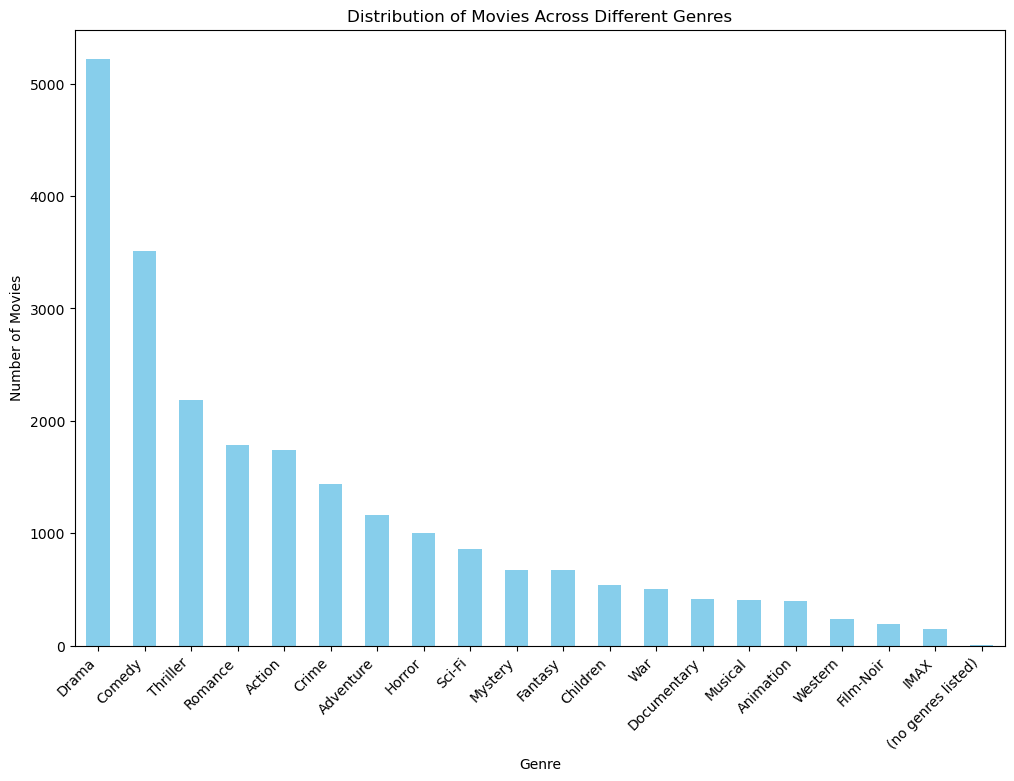

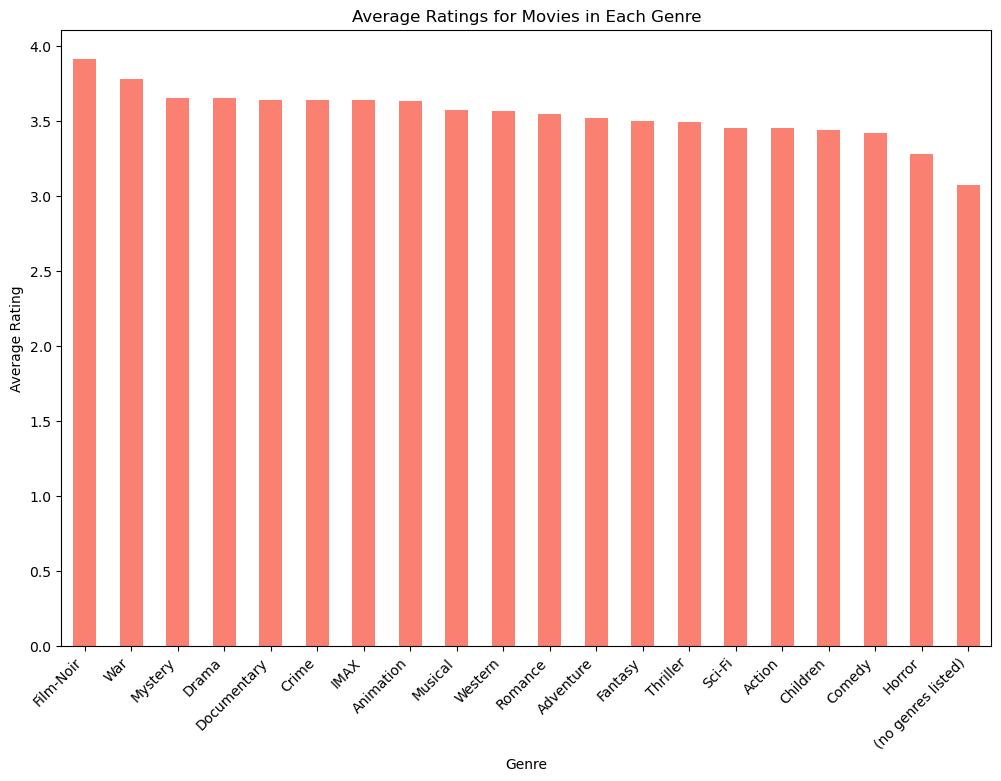

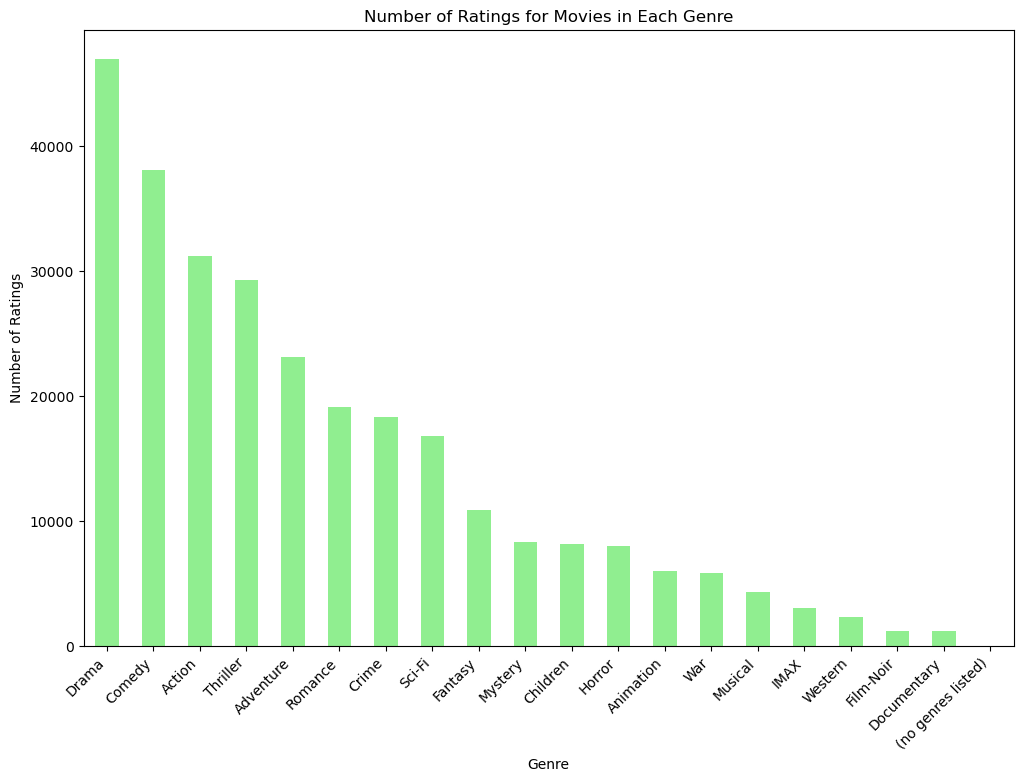

In [7]:
# Split genres and create a new dataframe with one genre per row
genres_df = movies_df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
movies_genre_df = movies_df.drop('genres', axis=1).join(genres_df)

# Distribution of movies across different genres
plt.figure(figsize=(12, 8))
genre_counts = movies_genre_df['genre'].value_counts()
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movies Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

# Average ratings for movies in each genre
genre_ratings = pd.merge(movies_genre_df, ratings_df, on='movieId', how='inner')
genre_ratings_mean = genre_ratings.groupby('genre')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
genre_ratings_mean.plot(kind='bar', color='salmon')
plt.title('Average Ratings for Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Most popular genres based on number of ratings
genre_ratings_count = genre_ratings.groupby('genre').size().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
genre_ratings_count.plot(kind='bar', color='lightgreen')
plt.title('Number of Ratings for Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Compute Movie Similarity Matrix based on genres
# Create a TF-IDF vectorizer to convert genres into numerical features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', tokenizer=lambda x: x.split('|'))
genres_matrix = tfidf_vectorizer.fit_transform(movies_df['genres'])

# Compute cosine similarity matrix
cosine_sim_matrix = cosine_similarity(genres_matrix, genres_matrix)

# Step 2: Recommend Similar Movies
def content_based_recommender(movie_title, num_recommendations=5):
    # Find the index of the movie in the dataframe
    movie_index = movies_df[movies_df['title'] == movie_title].index[0]
    
    # Get similarity scores for the movie with all other movies
    similarity_scores = list(enumerate(cosine_sim_matrix[movie_index]))
    
    # Sort movies based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the movie itself from the recommendations
    similarity_scores = similarity_scores[1:num_recommendations+1]
    
    # Get movie indices from the sorted list
    movie_indices = [x[0] for x in similarity_scores]
    
    # Return recommended movie titles
    recommended_movies = movies_df.iloc[movie_indices]['title'].values
    return recommended_movies

# Test the content-based recommender system
movie_title = 'Toy Story (1995)'  # Example movie title
num_recommendations = 5  # Number of recommendations
recommended_movies = content_based_recommender(movie_title, num_recommendations)
print(f"Recommended movies for '{movie_title}':")
for movie in recommended_movies:
    print(movie)


C:\Users\Samudranil Dutta\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Recommended movies for 'Toy Story (1995)':
Antz (1998)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Emperor's New Groove, The (2000)
Monsters, Inc. (2001)


In [9]:
# Step 1: Create User-Movie Matrix
user_movie_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Step 2: Compute Similarity Matrix between Users
from sklearn.metrics.pairwise import cosine_similarity

user_similarity_matrix = cosine_similarity(user_movie_matrix)

# Step 3: Recommend Movies for Target User
def collaborative_filtering_recommender(user_id, num_recommendations=5):
    # Get the similarity scores for the target user
    user_index = user_id - 1  # Users are 1-indexed
    user_similarity_scores = list(enumerate(user_similarity_matrix[user_index]))
    
    # Sort users based on similarity scores
    user_similarity_scores = sorted(user_similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the target user from the recommendations
    user_similarity_scores = user_similarity_scores[1:]
    
    # Get top similar users and their ratings
    similar_users_indices = [x[0] for x in user_similarity_scores[:num_recommendations]]
    similar_users_ratings = user_movie_matrix.iloc[similar_users_indices]
    
    # Calculate average ratings for each movie
    avg_ratings = similar_users_ratings.mean(axis=0)
    
    # Exclude movies already rated by the target user
    movies_rated_by_user = user_movie_matrix.loc[user_id]
    avg_ratings = avg_ratings.drop(movies_rated_by_user[movies_rated_by_user > 0].index)
    
    # Get top recommended movies
    top_recommendations = avg_ratings.sort_values(ascending=False).head(num_recommendations)
    
    return top_recommendations.index.tolist()

# Test the collaborative filtering recommender system
target_user_id = 1  # Example user ID
num_recommendations = 5  # Number of recommendations
recommended_movies = collaborative_filtering_recommender(target_user_id, num_recommendations)
print(f"Recommended movies for User {target_user_id}:")
for movie_id in recommended_movies:
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
    print(movie_title)


Recommended movies for User 1:
Memento (2000)
Lion King, The (1994)
Good Will Hunting (1997)
Pirates of the Caribbean: The Curse of the Black Pearl (2003)
X-Men (2000)


In [10]:
#Lets implement user-user collaborative filtering
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Compute User Similarity Matrix based on ratings
# Create a user-item matrix where rows represent users and columns represent movies
user_item_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Compute cosine similarity matrix between users
user_similarity_matrix = cosine_similarity(user_item_matrix)

# Step 2: Recommend Items to Target User
def user_user_collaborative_recommender(user_id, num_recommendations=5):
    # Find the index of the user in the similarity matrix
    user_index = ratings_df[ratings_df['userId'] == user_id].index[0]
    
    # Get similarity scores for the user with all other users
    similarity_scores = list(enumerate(user_similarity_matrix[user_index]))
    
    # Sort users based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Exclude the user itself from the recommendations
    similarity_scores = similarity_scores[1:]
    
    # Get top similar users
    top_similar_users = [x[0] for x in similarity_scores[:num_recommendations]]
    
    # Get movies liked by top similar users but not yet rated by the target user
    recommended_movies = []
    for similar_user in top_similar_users:
        movies_rated_by_similar_user = user_item_matrix.loc[similar_user]
        movies_not_rated_by_target_user = movies_rated_by_similar_user[movies_rated_by_similar_user == 0]
        recommended_movies.extend(movies_not_rated_by_target_user.index)
    
    return list(set(recommended_movies))[:num_recommendations]

# Test the user-user collaborative recommender system
user_id = 1  # Example user ID
num_recommendations = 5  # Number of recommendations
recommended_movies = user_user_collaborative_recommender(user_id, num_recommendations)
print(f"Recommended movies for User {user_id}:")
for movie_id in recommended_movies:
    movie_title = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
    print(movie_title)


Recommended movies for User 1:
So Big! (1932)
Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)


In [16]:

def submit_review():
    selected_movie_index = listbox.curselection()  # Get the index of the selected movie
    if selected_movie_index:  # Ensure a movie is selected
        selected_movie = listbox.get(selected_movie_index)  # Get the selected movie
        user_rating = rating_var.get()  # Get the user rating
        user_review = review_text.get("1.0", tk.END)  # Get the user review

        # Save the user rating and review to your dataset or database
        # You can implement the logic to store this information as per your requirements

        # Display a message confirming that the review has been submitted
        confirmation_label.config(text="Review submitted successfully for " + selected_movie)
    else:
        confirmation_label.config(text="Please select a movie before submitting the review.")

# Create Tkinter window
window = tk.Tk()
window.title("Movie Recommender System")

# Create a listbox to display movies
listbox = tk.Listbox(window, width=50, height=20)
for movie in movies_df['title']:
    listbox.insert(tk.END, movie)
listbox.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

# Create a label to display movie details
movie_details_label = tk.Label(window, text="", font=("Helvetica", 16), justify=tk.LEFT)
movie_details_label.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

# Add a rating input field (radio buttons)
rating_var = tk.IntVar()
rating_label = tk.Label(window, text="Select Rating:")
rating_label.pack(side=tk.TOP, pady=5)
for i in range(1, 6):
    rating_button = tk.Radiobutton(window, text=str(i), variable=rating_var, value=i)
    rating_button.pack(side=tk.TOP)

# Add a review text area
review_text = tk.Text(window, height=5, width=50)
review_text.pack(side=tk.TOP)

# Add a button to submit the review
submit_button = tk.Button(window, text="Submit Review", command=submit_review)
submit_button.pack(side=tk.TOP)

# Add a label to display confirmation message
confirmation_label = tk.Label(window, text="")
confirmation_label.pack(side=tk.TOP)

# Start the GUI main loop
window.mainloop()
